# Övningsuppgifter 1 - facit

*Av Anders Sundell*

Här är facit till Övningsuppgifter 1. [Klicka här för att komma tillbaka till själva uppgifterna.](excercise1_sv.html)

In [36]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_cs_jan18.dta", clear

(Quality of Government Basic dataset 2018 - Cross-Section)


## Datahantering

**Fråga 1.** Skapa en variabel, `dum_demokrati`, som har värdet 1 om fh_status har värdet 1, och 0 annars.

In [16]:
recode fh_status (1=1) (2 3 = 0), generate(dum_demokrati)

(105 differences between fh_status and dum_demokrati)


**Fråga 2.** Variablerna `wdi_expedu` och `wdi_exph` visar statens utgifter för utbildning respektive sjukvård som andel av BNP. Skapa en variabel som visar statens utgifter för utbildning och sjukvård. Kalla den `eduhealth`.

In [17]:
gen eduhealth = wdi_expedu + wdi_exph

(55 missing values generated)


**Fråga 3.** Gör en variabel som visar hur mycket mer stater lägger på sjukvård jämfört med utbildning. Kalla den `eduhealthdiff`.

In [18]:
gen eduhealthdiff = wdi_exph - wdi_expedu

(55 missing values generated)


**Fråga 4.** Variabeln `gle_rgdpc` visar BNP per capita i antal dollar. Gör en variabel `gdpc_1000` som visar BNP per capita, fast i tusentals dollar.

In [22]:
gen gdpc_1000 = gle_rgdpc/1000

(2 missing values generated)


**Fråga 5.** Variabeln `ht_colonial` visar vem landet tidigare varit koloniserad av. Ersätt alla 0 (aldrig koloniserat) med tecknet för missing, . 

In [23]:
recode ht_colonial (0=.)

(ht_colonial: 71 changes made)


## Beskrivande statistik
**Fråga 1.** Variablerna `wdi_lifexpf` och `wdi_lifexpm` visar förväntad livslängd vid födseln för kvinnor respektive män. Vad är medelvärdet för var och en de två variablerna?

In [25]:
sum wdi_lifexpf wdi_lifexpm


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
 wdi_lifexpf |        185    73.75092    8.548731     51.505      86.83
 wdi_lifexpm |        185    68.87415    7.874813     48.913       81.3



**Fråga 2.** Gör ett histogram för variabeln `unna_pop`, som visar landets befolkningsantal.

(bin=13, start=9893, width=1.053e+08)


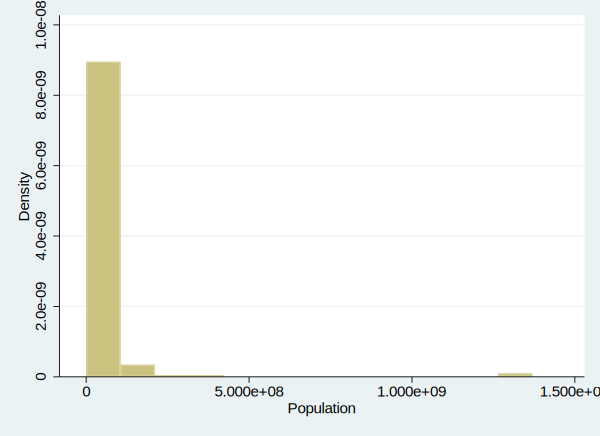

In [26]:
histogram(unna_pop)

**Fråga 3.** Variabeln `fh_status` visar om landet kategoriseras som Free, Partly free eller Not free. Gör en frekvenstabell som visar hur många länder som faller i varje kategori.

In [27]:
tab fh_status


    Freedom |
     Status |      Freq.     Percent        Cum.
------------+-----------------------------------
       Free |         89       45.88       45.88
Partly Free |         54       27.84       73.71
   Not Free |         51       26.29      100.00
------------+-----------------------------------
      Total |        194      100.00


**Fråga 4.** Variabeln `ti_cpi` visar Transparency Internationals korruptionsindex, där låga värden betyder att landet är mer korrupt. Sortera datamängden utifrån indexet, och gör en topplista på de 10 mest korrupta länderna.

In [39]:
gsort ti_cpi
list cname ti_cpi in 1/10




     +------------------------+
     |         cname   ti_cpi |
     |------------------------|
  1. |       Somalia        8 |
  2. |  Korea, North        8 |
  3. | Sudan (2012-)       11 |
  4. |   Afghanistan       12 |
  5. |   South Sudan       15 |
     |------------------------|
  6. |          Iraq       16 |
  7. |  Turkmenistan       17 |
  8. |       Eritrea       18 |
  9. |         Libya       18 |
 10. |    Uzbekistan       18 |
     +------------------------+


**Fråga 5.** Sortera nu istället efter fallande ordning, och gör en topplista på de tio minst korrupta länderna.

In [40]:
gsort -ti_cpi
list cname ti_cpi in 1/10




     +----------------------+
     |       cname   ti_cpi |
     |----------------------|
  1. |     Denmark       92 |
  2. | New Zealand       91 |
  3. |     Finland       89 |
  4. |      Sweden       87 |
  5. |      Norway       86 |
     |----------------------|
  6. | Switzerland       86 |
  7. |   Singapore       84 |
  8. | Netherlands       83 |
  9. |  Luxembourg       82 |
 10. |      Canada       81 |
     +----------------------+


**Fråga 6.** Variabeln `ti_cpi` visar Transparency Internationals korruptionsindex. För varje kategori i variabeln `fh_status`, vad är medelvärdet på korruptionsindexet?

In [28]:
table fh_status, contents(mean ti_cpi)


--------------------------
Freedom     |
Status      | mean(ti_cpi)
------------+-------------
       Free |    57.250412
Partly Free |    34.660377
   Not Free |    29.529412
--------------------------


**Fråga 7.** Variabeln `gol_est` visar vilken typ av valsystem landet har. Gör en korstabell som visar hur stor andel av länderna med olika valsystem som kan räknas som fria enligt variabeln `fh_status`.

In [29]:
tab gol_est fh_status, row


+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

   Electoral |
      System |
      Type-3 |          Freedom Status
     classes |      Free  Partly Fr   Not Free |     Total
-------------+---------------------------------+----------
Majoritarian |        26         17          6 |        49 
             |     53.06      34.69      12.24 |    100.00 
-------------+---------------------------------+----------
Proportional |        41         15          3 |        59 
             |     69.49      25.42       5.08 |    100.00 
-------------+---------------------------------+----------
       Mixed |        12          8          1 |        21 
             |     57.14      38.10       4.76 |    100.00 
-------------+---------------------------------+----------
       Total |        79         40         10 |       129 
             |     61.24      31.01       7.75 |    100.00 


## Korrelation och regression

**Fråga 1.** Gör en korrelationsmatris som visar de parvisa korrelationerna mellan de tre variablerna `ti_cpi`, `p_polity2` och `wdi_lifexp`. Är sambanden positiva eller negativa?

In [30]:
pwcorr ti_cpi p_polity2 wdi_lifexp


             |   ti_cpi p_poli~2 wdi_li~p
-------------+---------------------------
      ti_cpi |   1.0000 
   p_polity2 |   0.4351   1.0000 
  wdi_lifexp |   0.6568   0.2905   1.0000 


**Fråga 2.** Gör en scatterplot som visar sambandet mellan `p_polity2` (på x-axeln) och `ti_cpi` på (y-axeln). Lägg också till en regressionslinje.

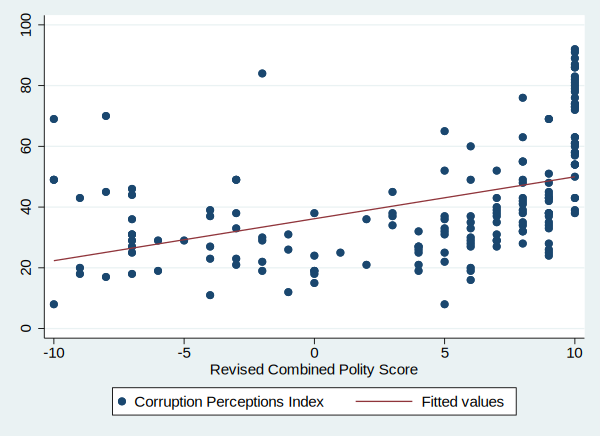

In [32]:
twoway (scatter ti_cpi p_polity2) (lfit ti_cpi p_polity2)

**Fråga 3.** Gör en regressionsanalys där `ti_cpi` är beroende variabel och `p_polity2` är oberoende variabel. Vad är b-koefficienten för `p_polity2`, dvs lutningen på linjen?

In [33]:
reg ti_cpi p_polity2


      Source |       SS           df       MS      Number of obs   =       164
-------------+----------------------------------   F(1, 162)       =     37.84
       Model |  11866.4497         1  11866.4497   Prob > F        =    0.0000
    Residual |  50808.6905       162  313.633892   R-squared       =    0.1893
-------------+----------------------------------   Adj R-squared   =    0.1843
       Total |  62675.1402       163  384.510063   Root MSE        =     17.71

------------------------------------------------------------------------------
      ti_cpi |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   p_polity2 |   1.381805   .2246455     6.15   0.000     .9381936    1.825416
       _cons |    36.1658   1.659724    21.79   0.000     32.88831    39.44328
------------------------------------------------------------------------------


**Fråga 4.** Använd b-koefficienten och interceptet i ovanstående analys och räkna ut vad ett land som har värdet 7 i demokrati förväntas ha för värde på korruptionsindexet.

In [35]:
display 36.17 + 1.38*7

45.83


**Fråga 5.** Upprepa föregående analys, men lägg nu till variabeln som visar avstånd från ekvatorn, `lp_lat_abst`. Vad händer med koefficienten för `p_polity2`?

In [34]:
reg ti_cpi p_polity2 lp_lat_abst


      Source |       SS           df       MS      Number of obs   =       133
-------------+----------------------------------   F(2, 130)       =     47.96
       Model |  22637.7978         2  11318.8989   Prob > F        =    0.0000
    Residual |   30677.721       130  235.982469   R-squared       =    0.4246
-------------+----------------------------------   Adj R-squared   =    0.4157
       Total |  53315.5188       132  403.905445   Root MSE        =    15.362

------------------------------------------------------------------------------
      ti_cpi |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   p_polity2 |   .7608305   .2291466     3.32   0.001     .3074914     1.21417
 lp_lat_abst |   62.58497   7.848372     7.97   0.000      47.0579    78.11203
       _cons |   23.40746    2.41369     9.70   0.000     18.63227    28.18266
--------------------------------------------------